# Data Exploration

In [66]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
#load data
train = pd.read_csv("../../data/training_values.csv", index_col= 'id')
target = pd.read_csv("../../data/training_labels.csv", index_col = 'id')

In [68]:
#get the first 10 information about the columns
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [69]:
#checking the first 10 rows of the target
target.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [70]:
#getting the information of the target
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  59400 non-null  object
dtypes: object(1)
memory usage: 928.1+ KB


In [71]:
#getting the information of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [72]:
#checking the sum of null values for the training data
train.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [73]:
#checking the sum of null values for the target data
target.isna().sum()

status_group    0
dtype: int64

In [74]:
#checking the columns to see if it contains same information
train[['scheme_name','scheme_management']]

,scheme_name,scheme_management
id,,
69572,Roman,VWC
8776,NaN,Other
34310,Nyumba ya mungu pipe scheme,VWC
67743,NaN,VWC
19728,NaN,NaN
...,...,...
60739,Losaa Kia water supply,Water Board
27263,Ikondo electrical water sch,VWC
37057,NaN,VWC


In [75]:
#checking the columns to see if it contains same information
train[['waterpoint_type','waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
id,,
69572,communal standpipe,communal standpipe
8776,communal standpipe,communal standpipe
34310,communal standpipe multiple,communal standpipe
67743,communal standpipe multiple,communal standpipe
19728,communal standpipe,communal standpipe
...,...,...
60739,communal standpipe,communal standpipe
27263,communal standpipe,communal standpipe
37057,hand pump,hand pump


# Understanding the Data

In [76]:
#understanding the Data using the describe() method
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [77]:
#looking at the train columns to see if there is any we need to drop
train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [78]:
train[[col for col in train.columns if train[col].dtype == 'object']].describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [79]:
target_new = {'functional':1,'non functional':0, 'functional needs repair': 0}
target['status_group'] = target['status_group'].replace(target_new)

In [80]:
target['status_group']

id
69572    1
8776     1
34310    1
67743    0
19728    1
        ..
60739    1
27263    1
37057    1
31282    1
26348    1
Name: status_group, Length: 59400, dtype: int64

In [81]:
X = train
y = target['status_group']

In [82]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [83]:
y.value_counts(normalize = True)

1    0.543081
0    0.456919
Name: status_group, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((44550, 39), (14850, 39), (44550,), (14850,))

<AxesSubplot:>

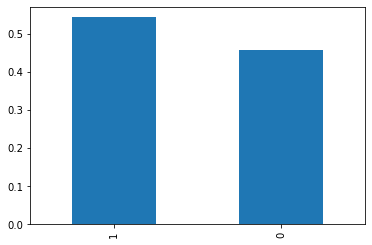

In [85]:
y.value_counts(normalize =True).plot(kind='bar')

In [86]:
#set up list for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols =[]

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
    elif X[col].nunique() < 10:
        ohe_cols.append(col)
    else:
        freq_cols.append(col)

In [87]:
print(num_cols)
print(ohe_cols)
print(freq_cols)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
['basin', 'public_meeting', 'recorded_by', 'permit', 'extraction_type_class', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'source']


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [89]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value= 0,)),
    ('oh_encoder', OneHotEncoder(drop='first',handle_unknown= 'error'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value= np.nan))
])

In [90]:
# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [91]:
X_tr_transformed = preprocessor.fit_transform(X_train)
X_tr_transformed.shape

(44550, 94)

In [28]:
pd.DataFrame(X_tr_transformed)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.000000,0.412238,0.912881,0.706062,0.0,0.010204,0.0875,0.016393,0.996523,0.0,...,0.000404,0.056117,0.016857,0.000382,0.175578,0.000022,0.448956,0.448956,0.159439,0.284377
1,0.000000,0.031469,0.841709,0.188963,0.0,0.112245,0.0375,0.000000,0.000000,1.0,...,0.000112,0.078182,0.014366,0.001706,0.618721,0.002716,0.448956,0.448956,0.680224,0.284377
2,0.004286,0.536713,0.760495,0.693333,0.0,0.153061,0.0125,0.022951,0.997516,0.0,...,0.000045,0.442245,0.015241,0.000561,0.618721,0.475398,0.161751,0.137531,0.159439,0.186442
3,0.000000,0.031469,0.000000,1.000000,0.0,0.183673,0.0750,0.000000,0.000000,0.0,...,0.000045,0.052503,0.008350,0.001010,0.618721,0.000022,0.080561,0.104781,0.680224,0.186442
4,0.001429,0.519231,0.858342,0.238957,0.0,0.102041,0.0500,0.001639,0.982613,0.0,...,0.000022,0.089764,0.042088,0.002492,0.175578,0.004175,0.448956,0.448956,0.159439,0.162985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.000000,0.636014,0.857643,0.880754,0.0,0.193878,0.0125,0.006557,0.988077,0.0,...,0.000022,0.442245,0.003502,0.000269,0.618721,0.000022,0.448956,0.448956,0.680224,0.284377
44546,0.000000,0.332867,0.779349,0.383034,0.0,0.142857,0.0125,0.003934,0.995529,0.0,...,0.000247,0.442245,0.011380,0.000090,0.618721,0.475398,0.138788,0.138788,0.680224,0.082492
44547,0.005714,0.282517,0.893466,0.056729,0.0,0.091837,0.0625,0.011803,0.993045,0.0,...,0.008732,0.442245,0.011717,0.000853,0.618721,0.475398,0.138788,0.138788,0.110303,0.283704
44548,0.000029,0.501049,0.921504,0.722954,0.0,0.020408,0.0625,0.002131,0.993045,0.0,...,0.000090,0.074411,0.010887,0.001930,0.175578,0.002694,0.448956,0.448956,0.050034,0.284377


In [29]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'region_code',
                                  'district_code', 'population',
                                  'construction_year']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['basi...
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_grou

In [31]:
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.48534608, 1.45616627, 1.49420404, 1.54640889, 1.5674603 ]),
 'score_time': array([15.7350316 , 16.26554966, 16.36108899, 17.82340503, 15.8837769 ]),
 'test_score': array([0.78350168, 0.78282828, 0.78843996, 0.78720539, 0.78069585]),
 'train_score': array([0.85448934, 0.85462963, 0.85339506, 0.85401235, 0.85260943])}

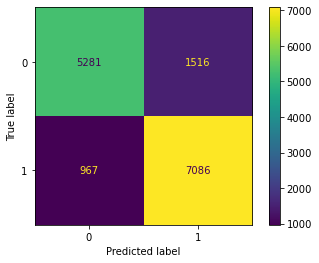

In [60]:
Knn_classifier.fit(X_test,y_test)
Knn_classifier.predict(X_test)
plot_confusion_matrix(Knn_classifier,X_test,y_test)

# Grid Search CV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [44]:
param = [{ 
    'classifier__n_neighbors': [3,10],
    'classifier__metric':['euclidean']}]

In [45]:
grid = GridSearchCV(estimator = Knn_classifier,
                    param_grid = param, scoring='accuracy')

In [46]:
output = grid.fit(X_train,y_train)

In [47]:
output.best_params_

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}

In [48]:
output.best_estimator_.fit(X_train,y_train)
preds = output.best_estimator_.predict(X_test)

In [49]:
preds

array([0, 0, 1, ..., 1, 1, 1])

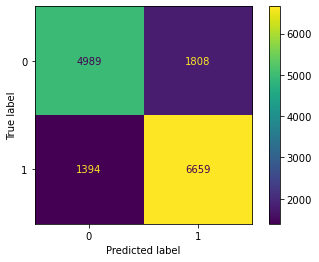

In [58]:
plot_confusion_matrix(output.best_estimator_,X_test,y_test)